<img src="./logo_UTN_3.svg" align="right" width="200" /> 

### Teoría de los Circuitos 2

# Trabajo semanal 12
### Axel Nathanel Nahum


## Introduccion

En este $Jupyter$ nos encontraremos con la resolucion de los $ejercicios$ $1$ y $2$ de la $TS12$. En este caso nos encontramos con la $sintesis$ de $circuitos$ a partir de dos $funciones$ $transferencia$ dadas.

<img src="./Enunciado_.PNG" align="middle" width="1000" /> 

## Resolucion

### Resolucion ejercicio 1

In [40]:
from IPython.display import IFrame
IFrame("./Resolucion_EJ1_.pdf", width=900, height=1000)

### Resolucion ejercicio 2

In [41]:
from IPython.display import IFrame
IFrame("./Resolucion_EJ2.pdf", width=900, height=900)

## Ejercicio 1)

In [28]:
import sympy as sp
from pytc2.remociones import remover_valor_en_infinito, remover_valor, remover_polo_dc, remover_polo_sigma
from pytc2.dibujar import display, Capacitor, Inductor, Drawing, dibujar_puerto_entrada, dibujar_funcion_exc_abajo, dibujar_elemento_serie, dibujar_tanque_RC_serie, dibujar_espacio_derivacion, dibujar_tanque_RC_serie, dibujar_puerto_salida, dibujar_elemento_derivacion      

# Resolución simbólica

s = sp.symbols('s ', complex=True)

Z22 = 5*((s + 2)*(s + sp.Rational('13/2')))/((s + 1)*(s + 4))

In [39]:
omega_cero = 1   # Omega de resonancia

Z2, Z1, R3, C2 = remover_polo_sigma(Z22, omega_cero, isImpedance = True, isRC = True)

omega_cero = 4   # Omega de resonancia

Z4, Z3, R2, C1 = remover_polo_sigma(Z2, omega_cero, isImpedance = True)

Y6, G1 = remover_valor(1/Z4, sigma_zero = sp.Rational('1/5'))

print('Verificación por parámetros ABCD (T)')

TR1 = sp.Matrix([[1, 0], [G1, 1]])
TR2C2R3C3RL = sp.Matrix([[1, Z1 + Z3 + 1], [0, 1]])

tt =  TR1 * TR2C2R3C3RL

# calculo 1/C de la cascada total
zverif = sp.factor(sp.simplify(sp.expand(1/tt[1,1])))

display( zverif )

Verificación por parámetros ABCD (T)


10*(s + 1)*(s + 4)/((s + 6)*(12*s + 23))

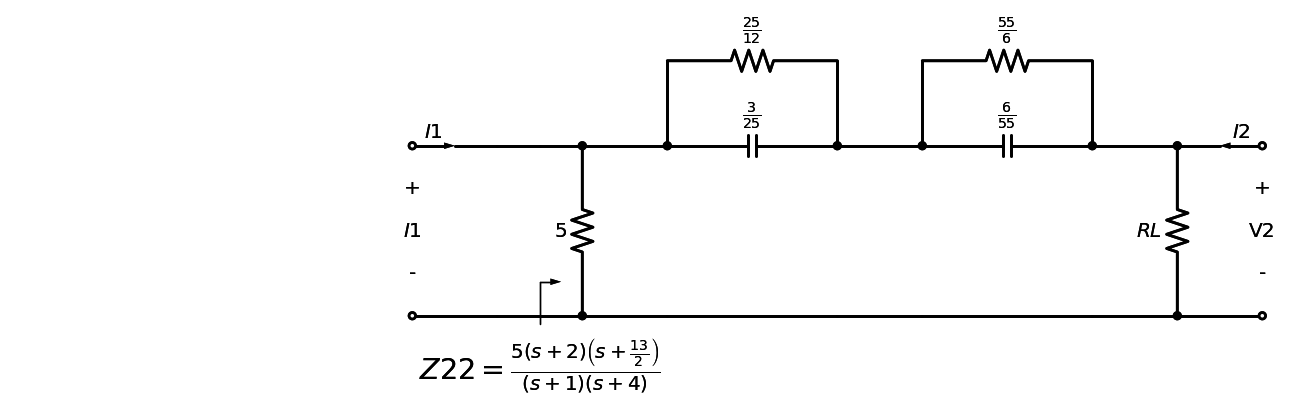

In [107]:
# Dibujamos la red resultante:

d = Drawing(unit=4)

d = dibujar_puerto_entrada(d, voltage_lbl = ('+', '$I1$', '-'), current_lbl = '$I1$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 'Z22', Z22, hacia_salida = True, k_gap_width = 0.5)

d = dibujar_elemento_derivacion(d, Resistor, 1/G1)

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_RC_serie(d, R2, C1)

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_RC_serie(d, R3, C2)

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, Resistor, "RL")

d = dibujar_puerto_salida(d, voltage_lbl = ('+', 'V2', '-'), current_lbl = '$I2$')

display(d)

$Y11$ tiene como definicion:

$$Y11 = \left[\frac{I1}{V1}\right]_{V2\space=\space0}$$

Por lo tanto, para poder decir que la $entrada$ es $Y11$, ya que poner en corto la $salida$, es decir, $V2$ $=$ $0$.

## Ejercicio 2)

In [17]:
import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Resistor, Capacitor, Inductor

from pytc2.remociones import remover_valor_en_infinito, remover_valor, remover_polo_dc,remover_polo_sigma, remover_polo_infinito, remover_polo_jw

from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_arriba, dibujar_funcion_exc_abajo, dibujar_elemento_serie, dibujar_espacio_derivacion, Resistor, Capacitor, dibujar_puerto_salida, Drawing, dibujar_tanque_serie, dibujar_elemento_derivacion

# 2) Dada la siguiente transferencia de impedancia:

s = sp.symbols('s ', complex=True)
k = sp.symbols('k ')

# Zt = V2/I1
Zt = k*(s**2 + 9)/(s**3 + 2*s**2 + 2*s + 1)

# a) Sintetizar un cuadripolo pasivo sin pérdidas, 
#    que cumpla con la transimpedancia indicada, 
#    cargado a la salida con una impedancia como se 
#    muestra en la figura. (Ver TS14)

# Resolución simbólica

# del esquema se deduce:

# Zt = z21/(1+ z22)
# Sintetizo z22

z22 = (2*s**2+1)/(s**3+2*s)

In [38]:
# remoción parcial en infinito de 1/z22
y3, Yc3 = remover_polo_infinito(1/z22, omega_zero=3)

c3 = Yc3/s

# remoción total en +/-j3
z5, z4, l1, c2 = remover_polo_jw(1/y3, omega = 3, isImpedance = True  )

# remoción total en infinito
y7, Yc1 = remover_polo_infinito(1/z5)

c1 = Yc1/s

print('Verificación por parámetros ABCD (T)')

Tc1 = sp.Matrix([[1, 0], [Yc1, 1]])
Tc2l1 = sp.Matrix([[1, z4], [0, 1]])
Tc3yrl = sp.Matrix([[1, 0], [Yc3+1, 1]])

tt =  Tc1 * Tc1l1 * Tc3yl

# calculo 1/C de la cascada total
zverif = sp.factor(sp.simplify(sp.expand(1/tt[1,0])))

display( zverif )

print('Verificación por MAI')

input_port = [0, 1]
output_port = [2, 1]

'''    
+ Numeramos los polos de 0 a n=3

    0-------0---Y2----2------2
            |         |      
            Y1        Y3
            |         |
    1-------1---------1------1
    
'''    

Ymai = sp.Matrix([  
                    [ Yc1+1/z4,  -Yc1,      -1/z4 ],
                    [ -Yc1,    Yc1+Yc3+1,   -Yc3-1  ],
                    [ -1/z4,    -Yc3-1,     1/z4+Yc3+1]
                 ])
 
Zmai = tc2.calc_MAI_ztransf_ij_mn(Ymai, output_port[0], output_port[1], input_port[0], input_port[1], verbose=True)

display( Zmai )   

print (Tc1)

print (z4)


Verificación por parámetros ABCD (T)


(s**2 + 9)/(9*(s + 1)*(s**2 + s + 1))

Verificación por MAI


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

(s**2 + 9)/(9*(s*(s**2 + 2*s + 2) + 1))

Matrix([[1, 0], [27*s/17, 1]])
289*s/(27*(s**2 + 9))


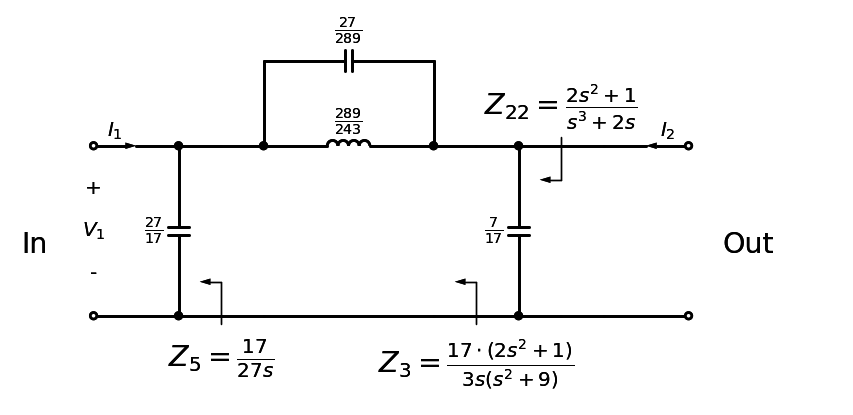

In [13]:
# Dibujo de la red sintetizada

d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

d = dibujar_puerto_entrada(d,
                               port_name = 'In', 
                               voltage_lbl = ('+', '$V_1$', '-'), 
                               current_lbl = '$I_1$')

d = dibujar_elemento_derivacion(d, Capacitor, c1)

d, z5_lbl = dibujar_funcion_exc_abajo(d, 
                                          'Z_{5}',  
                                          z5, 
                                          hacia_entrada = True,
                                          k_gap_width = 0.5)

d = dibujar_tanque_serie(d, l1,c2)

d, z3_lbl = dibujar_funcion_exc_abajo(d, 
                                          'Z_{3}',  
                                          1/y3, 
                                          hacia_entrada = True,
                                          k_gap_width = 0.5)

d = dibujar_elemento_derivacion(d, Capacitor, c3)

d, z22_lbl = dibujar_funcion_exc_arriba(d, 
                                            'Z_{22}',  
                                            z22, 
                                            hacia_entrada  = True, 
                                            k_gap_width = 0.5)

d = dibujar_puerto_salida(d, 
                              port_name = 'Out', 
                              current_lbl = '$I_2$' )


display(d)

Los valores de las $resoluciones$ verifican con lo hayado en los $codigos$.

## Circuito LTSpice EJ1

<img src="./Circuito_1_.PNG" align="middle" width="1000" /> 

## Respuesta en frecuencia EJ1

<img src="./Circuito_1_R_EN_F.PNG" align="middle" width="1000" /> 

En este grafico observamos al $respuesta$ $en$ $frecuencia$ $del$ $ejercicio$ $1$. Podemos ver como verifica la $transferencia$ pedida. En este caso un pasa-altos que no elimina el total de la $baja$ $frecuencia$ pero si la atenua bastante mas que la atenuacion de las altas frecuencias (si, tiene atenuacion). Cabe destacar que estamos trabajando con sintesis pasivas, asi que es normal que haya $atenuacion$. 

Para hacer un analisis un poco mas amplio, partiremos de la $transferencia$ dada en el enunciado. Es decir:

$$T(S) = \frac{-I_2}{I_1} = H\frac{(S^2 + 5S + 4)}{(S^2 + 8S + 12)}$$

$donde:$ $H = \frac{5}{6}$

Si hacemos que $S$ tome el valor de 0, es decir, $continua$, observamos que el valor que devuelve la $transferencia$ es $\frac{5}{18}$, lo cual es aproximadamente $278.10^{-3}$. Esto verifica lo hayado en el grafico en la parte de baja $recuencia$. 

Ahora hacemos lo mismo para $infinito$. Este caso es mas facil ya que nos queda $H$, es decir, $\frac{5}{6}$. Este valor es aproximadamente $833.10^{-3}$. De igual manera, este valor verifica lo del grafico.

## Circuito LTSpice EJ2

<img src="./Circuito_2.PNG" align="middle" width="1000" /> 

## Respuesta en frecuencia EJ2

<img src="./Circuito_2_R_EN_F.PNG" align="middle" width="1000" /> 

En este caso observamos que se trata de un $filtro$ $notch$ $Pasa-Bajos$. Para hacer la verificacion, tambien partimos de la transferencia. En este caso es:

$$ T(s) = \frac{V_2}{I_1} = \frac{k.(s^2 + 9)}{ s^3 + 2.s^2 + 2.s + 1 } $$

$donde:$ $K = \frac{1}{9}$

Ya de una se ve que el $filtro$ debe eliminar la $frecuencia$ $\omega = 3$. Este $\omega$ corresponde a la frecuencia $477mHz$. Como se puede ver en el grafico, justo corta ahi asi que por ese lado, verifica. 

Ahora, veamos que pasa en $0$ e $infinito$. Por el lado de 0, la transferencia da un valor de $9.K$. Osea que en baja $frecuencia$ debemos tener una ganacia de 1, es decir, $0dB$. Esto se verifica correctamente. Por el lado de $infinito$, la $transferencia$ nos devuelve un valor de practicamente $0$. Tambien se verifica asi que el $filtro$ esta diseñado correctamente.

Cabe destacar que en $python$, el circuito nos queda igual que en el analisis numerico visto en el $PDF$.